Steady state reached at iteration 50408


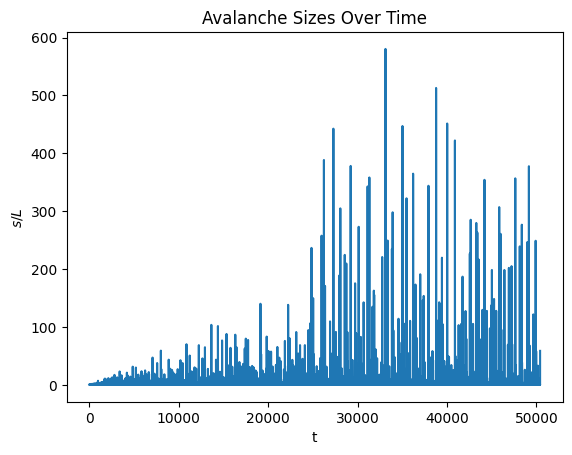

Steady state reached at iteration 3741
Steady state reached at iteration 7945
Steady state reached at iteration 29827


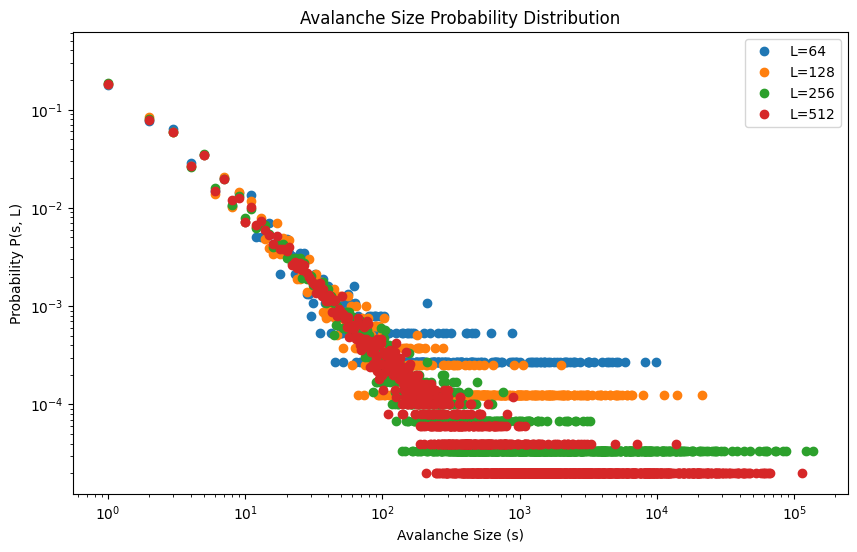

In [62]:
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

class OsloModel:
    def __init__(self, size):
        self.size = size
        self.slopes = [random.randint(0, 2) for _ in range(size)]  # Initial heights of the sites
        self.thresholds = [random.randint(1, 2) for _ in range(size)]  # Thresholds for each site
        
    def drive(self):
        """Add a grain to the first site."""
        self.slopes[0] += 1

    def relax(self):
        """Relax the pile by redistributing grains."""
        efflux = 0
        avalanche_size = 0
        while True:
            moved = False
            for i in range(self.size):
                if self.slopes[i] > self.thresholds[i]:
                    if i == 0:
                        self.slopes[i] -= 2
                        self.slopes[i + 1] += 1
                    elif i == self.size - 1:
                        self.slopes[i] -= 1
                        self.slopes[i - 1] += 1
                        efflux += 1
                    else:
                        self.slopes[i] -= 2
                        self.slopes[i - 1] += 1
                        self.slopes[i + 1] += 1
                    self.thresholds[i] = random.randint(1, 2)
                    avalanche_size += 1
                    moved = True
            if not moved:
                break

        return avalanche_size, efflux

def run_simulation(size, max_iterations, steady_state_threshold=0.02, window_size=100):
    sim = OsloModel(size)
    avalanche_sizes = []
    steady_state_coeffs = []
    influx_window = deque(maxlen=window_size)
    efflux_window = deque(maxlen=window_size)
    
    for t in range(max_iterations):
        sim.drive()
        influx_window.append(1)
        avalanche_size, efflux = sim.relax()
        avalanche_sizes.append(avalanche_size)
        efflux_window.append(efflux)

        if len(influx_window) == window_size:
            avg_influx = sum(influx_window)
            avg_efflux = sum(efflux_window)
            if avg_efflux / avg_influx >= (1 - steady_state_threshold) and avg_efflux / avg_influx <= (1 + steady_state_threshold):
                print(f"Steady state reached at iteration {t}")
                break
            steady_state_coeffs.append(avg_efflux / avg_influx)
    
    return avalanche_sizes, steady_state_coeffs

def plot_avalanche_size_over_time(size, iterations):
    avalanche_sizes, _ = run_simulation(size, iterations)
    proportional_avalanches = [avalanche_size / size for avalanche_size in avalanche_sizes]
    plt.plot(proportional_avalanches)
    plt.xlabel('t')
    plt.ylabel('$s/L$')
    plt.title('Avalanche Sizes Over Time')
    plt.show() 

def calculate_probability_distribution(avalanche_sizes):
    unique, counts = np.unique(avalanche_sizes, return_counts=True)
    probabilities = counts / len(avalanche_sizes)
    return unique, probabilities

def plot_avalanche_size_distribution(sizes, iterations):
    plt.figure(figsize=(10, 6))
    
    for size in sizes:
        avalanche_sizes, _ = run_simulation(size, iterations)
        unique_sizes, probabilities = calculate_probability_distribution(avalanche_sizes)
        plt.plot(unique_sizes, probabilities, label=f'L={size}', marker='o', linestyle='')

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Avalanche Size (s)')
    plt.ylabel('Probability P(s, L)')
    plt.title('Avalanche Size Probability Distribution')
    plt.legend()
    plt.show()

plot_avalanche_size_over_time(256, 80_000)
sizes = [64, 128, 256, 512]
max_iters = 50_000
plot_avalanche_size_distribution(sizes, max_iters)